<a href="https://colab.research.google.com/github/pascal-bergeron/ai4forgood2016/blob/main/AI4Good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cp '/content/drive/My Drive/projects/AIForGood2020' . -r   

In [ ]:
cd AIForGood2020/

/content/drive/.shortcut-targets-by-id/192dLwBRwwmU3N6MwfW-KhVBUraQoLmTq/AIForGood2020


In [ ]:
!unrar e -p*hack20 211GrandMontreal_DataPack.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from 211GrandMontreal_DataPack.rar


Would you like to replace the existing file Références.xlsx
7966092 bytes, modified on 2020-11-14 16:00
with a new one
7966092 bytes, modified on 2020-09-04 16:05

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  Références.xlsx                                               14% 26%  OK 
Extracting  Appels.xlsx                                                   37%  OK 
Extracting  Appels_Profil.xlsx                                            47%  OK 
Extracting  BDorg_Contact.xlsx                                            48%  OK 
Extracting  BDorg_Général.xlsx                                            50%  OK 
Extracting  BDorg_information.xlsx                                        54%  OK 
Extracting  BDorg_Localisation.xlsx                                       55%  OK 
Extracting  BDorg_

In [ ]:
appels = pd.read_excel('Appels.xlsx')

In [ ]:
appels.tail()

,CallReportNum,CallDateAndTimeStart,StateProvince,Heure,Code postal court,Municipalité_Code
101607,78144190,2020-08-31,QC,17,J3L,57005.0
101608,78144749,2020-08-31,QC,17,NaN,66200.0
101609,78144910,2020-08-31,NaN,17,NaN,999999.0
101610,78145762,2020-08-31,QC,17,H7N,65105.0
101611,78146045,2020-08-31,QC,17,J4Y,58007.0


In [ ]:
import numpy
numpy.delete(appels, numpy.s_[5:5], axis=1)  

,CallReportNum,CallDateAndTimeStart,StateProvince,Heure,Code postal court,Municipalité_Code
0,51805319,2018-04-01,QC,10,NaN,999001
1,51805954,2018-04-01,QC,11,H1T,66213
2,51806285,2018-04-01,QC,12,NaN,66023
3,51806377,2018-04-01,QC,12,H1J,66201
4,51806428,2018-04-01,QC,12,H2K,66217
...,...,...,...,...,...,...
101607,78144190,2020-08-31,QC,17,J3L,57005
101608,78144749,2020-08-31,QC,17,NaN,66200
101609,78144910,2020-08-31,NaN,17,NaN,999999
101610,78145762,2020-08-31,QC,17,H7N,65105


In [ ]:
appels_profils = pd.read_excel('Appels_Profil.xlsx')

In [ ]:
appels_profils.tail()

,CallReportNum,Âge,Catégorie d'âge,Genre,Langue,Mode De Communication
101607,78144190,2.0,0-19 ans,Femme,Français,Appels
101608,78144749,27.0,20-29 ans,Femme,Français,Appels
101609,78144910,NaN,NaN,Femme,Anglais,Appels
101610,78145762,85.0,70 ans et plus,Femme,Français,Appels
101611,78146045,4.0,0-19 ans,Homme,Anglais,Appels


In [ ]:
np.random.seed(0)

In [ ]:
appels_profils.groupby("Genre").size()

Genre
Autre      494
Femme    66303
Homme    34516
dtype: int64

In [ ]:
train_data1 = appels_profils
k = [2,3,4]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x1=train_data1[['Genre', 'Langue']]
x1

,Genre,Langue
0,Femme,Français
1,Homme,Français
2,Homme,Français
3,Homme,Français
4,Homme,Français
...,...,...
101607,Femme,Français
101608,Femme,Français
101609,Femme,Anglais
101610,Femme,Français


In [ ]:
x1['Genre'] = x1['Genre'].replace(['Femme'],'1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x1['Genre'] = x1['Genre'].replace(['Homme'],'2')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x1['Genre'] = x1['Genre'].replace(['Autre'],'3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x1.groupby("Genre").size()

Genre
1    66303
2    34516
3      494
dtype: int64

In [ ]:
x1

,Genre,Langue
0,1,Français
1,2,Français
2,2,Français
3,2,Français
4,2,Français
...,...,...
101607,1,Français
101608,1,Français
101609,1,Anglais
101610,1,Français


In [ ]:
x1['Langue'] = x1['Langue'].replace(['Français'],'11')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x1['Langue'] = x1['Langue'].replace(['Anglais'],'22')
x1['Langue'] = x1['Langue'].replace(['Arabe / Arabic'],'33')
x1['Langue'] = x1['Langue'].replace(['Autre / Other'],'44')
x1['Langue'] = x1['Langue'].replace(['Créole / Creole'],'55')
x1['Langue'] = x1['Langue'].replace(['Espagnol / Spanish'],'66')
x1['Langue'] = x1['Langue'].replace(['Portugais / Portuguese'],'77')
x1['Langue'] = x1['Langue'].replace(['Système de Traduction - Language Line Solution'],'88')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
x1.groupby("Langue").size()

Langue
11    86961
22    14066
33       18
44       22
55       12
66      152
77        7
88       46
dtype: int64

In [ ]:
x1 = x1.dropna()

In [ ]:
# insert and run your answer here for k[0]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k[0])
kmeans.fit(x1)
y_kmeans = kmeans.predict(x1)
y_kmeans


array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

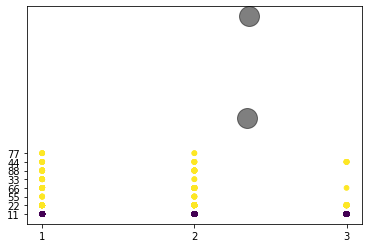

In [ ]:
#plotting
plt.scatter(x1['Genre'], x1[ 'Langue'], c=y_kmeans,
            s=22, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5);

In [ ]:
train_data2 = appels_profils
k = [2,3,4,5,6,7,8,9,10,11,12,13]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x2=train_data2[['Genre', 'Âge']]
x2

,Genre,Âge
0,Femme,NaN
1,Homme,35.0
2,Homme,NaN
3,Homme,40.0
4,Homme,NaN
...,...,...
101607,Femme,2.0
101608,Femme,27.0
101609,Femme,NaN
101610,Femme,85.0


In [ ]:
x2.groupby("Âge").size()

Âge
0.0       5
1.0      78
2.0      58
3.0      50
4.0      82
         ..
100.0    15
101.0     4
102.0     9
103.0     1
105.0     3
Length: 105, dtype: int64

In [ ]:
x2['Genre'] = x2['Genre'].replace(['Femme'],'1')
x2['Genre'] = x2['Genre'].replace(['Homme'],'2')
x2['Genre'] = x2['Genre'].replace(['Autre'],'3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
x2 = x2.dropna()

In [ ]:
# insert and run your answer here for k[0]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k[11])
kmeans.fit(x2)
y_kmeans = kmeans.predict(x2)
y_kmeans


array([ 7,  1,  6, ...,  9, 10,  8], dtype=int32)

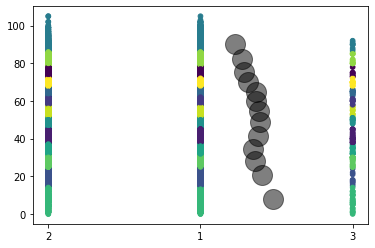

In [ ]:
#plotting
plt.scatter(x2['Genre'], x2[ 'Âge'], c=y_kmeans,
            s=22, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5);

In [ ]:
appels.groupby("StateProvince").size()

StateProvince
AB        16
BC        10
MB         3
NB         1
NS         4
ON       119
QC    101400
SK         2
xx        45
dtype: int64

In [ ]:
train_data = appels

 Clustering
Using two features, cluster the data in the following order (use scikit-learn).

k-means
consider k=2,3,4
visualize clustered points 


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
k = [2,3,4]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x=train_data[['StateProvince', 'CallReportNum']]
x


,StateProvince,CallReportNum
0,QC,51805319
1,QC,51805954
2,QC,51806285
3,QC,51806377
4,QC,51806428
...,...,...
101607,QC,78144190
101608,QC,78144749
101609,NaN,78144910
101610,QC,78145762


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['QC'],'1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x

,StateProvince,CallReportNum
0,1,51805319
1,1,51805954
2,1,51806285
3,1,51806377
4,1,51806428
...,...,...
101607,1,78144190
101608,1,78144749
101609,NaN,78144910
101610,1,78145762


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['ON'],'2')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['xx'],'3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['AB'],'4')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['BC'],'5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['NS'],'6')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['MB'],'7')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['NB'],'9')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['StateProvince'] = x['StateProvince'].replace(['SK'],'8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x

,StateProvince,CallReportNum
0,1,51805319
1,1,51805954
2,1,51806285
3,1,51806377
4,1,51806428
...,...,...
101606,1,78143887
101607,1,78144190
101608,1,78144749
101610,1,78145762


In [ ]:
x.groupby("StateProvince").size()

StateProvince
1    101400
2       119
3        45
4        16
5        10
6         4
7         3
8         1
9         2
dtype: int64

In [ ]:
# insert and run your answer here for k[0]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k[0])
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

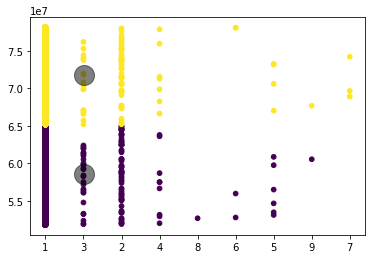

In [ ]:
#plotting
plt.scatter(x['StateProvince'], x[ 'CallReportNum'], c=y_kmeans,
            s=22, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5);

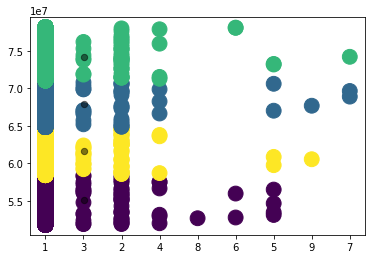

In [ ]:
#  answer here for k[2]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k[2])
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

y_kmeans

#plotting
plt.scatter(x['StateProvince'], x[ 'CallReportNum'], c=y_kmeans,
            s=220, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=40, alpha=0.5);

DBscan, use eps=0.1 and min_samples=30

In [ ]:

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=30).fit(x)
clustering

y_dbscan =clustering.fit_predict(x)
y_dbscan






array([-1, -1, -1, ..., -1, -1, -1])

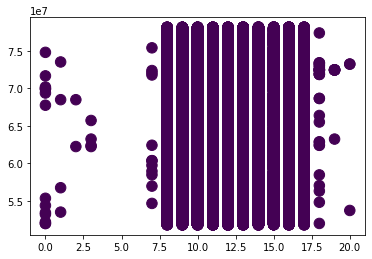

In [ ]:
#plotting
plt.scatter(x['Heure'], x[ 'CallReportNum'], c=y_dbscan,
            s=110, cmap='viridis')


In [ ]:
train_data = appels_profils

In [ ]:
k = [2,3,4]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x=train_data[['Genre', 'Langue']]
x

,Genre,Langue
0,Femme,Français
1,Homme,Français
2,Homme,Français
3,Homme,Français
4,Homme,Français
...,...,...
101607,Femme,Français
101608,Femme,Français
101609,Femme,Anglais
101610,Femme,Français


In [ ]:
import pandas as pd
x = x.dropna()
x

,StateProvince,CallReportNum
0,1,51805319
1,1,51805954
2,1,51806285
3,1,51806377
4,1,51806428
...,...,...
101606,1,78143887
101607,1,78144190
101608,1,78144749
101610,1,78145762


In [ ]:
bdorg_contacts = pd.read_excel('BDorg_Contact.xlsx')

In [ ]:
bdorg_contacts.tail()

,ResourceAgencyNum,Phone1Number,Phone1Description,Phone1IsPrivate,PhoneNumberBusinessLine,PhoneNumberBusinessLineDescription,PhoneNumberBusinessLineIsPrivate,EmailAddressMain,WebsiteAddress,Custom_Facebook Page,Custom_Twitter
5551,18760880,514 842-4464,NaN,False,514 842-4464,NaN,False,NaN,fr.shrinershospitalsforchildren.org,facebook.com/ShrinersHospitalsforChildren,twitter.com/shrinershosp
5552,18760573,1 800 363-6048,NaN,False,514 935-2501,NaN,False,NaN,www.oiiq.org,www.facebook.com/OIIQSante,twitter.com/oiiq
5553,18765867,1 877 356-3226,NaN,False,514 362-2930,NaN,False,NaN,www.croixrouge.ca,www.facebook.com/CroixRougeQuebec,twitter.com/croixrouge_qc
5554,18760090,514 526-1699,NaN,False,514 526-1699,NaN,False,NaN,www.pasdelarue.org,www.facebook.com/Le-PAS-de-la-rue-366730670033857,twitter.com/Pasdelarue
5555,18763900,NaN,NaN,False,NaN,NaN,False,NaN,www.educaloi.qc.ca,www.facebook.com/educaloi,twitter.com/educaloi


In [ ]:
bdorg_general = pd.read_excel('BDorg_Général.xlsx')

In [ ]:
bdorg_general.tail()

,ResourceAgencyNum,PublicName,LegalStatus,AlternateName,TaxonomyLevelName,ParentAgency,ParentAgencyNum,LastVerifiedOn,LanguageOfRecord,Custom_Statut temporaire Covid-19,Custom_Acronym
5551,30790854,BIBLIOTHÈQUE PUBLIQUE DE DOLLARD-DES-ORMEAUX,organisme municipal,NaN,Program,DOLLARD-DES-ORMEAUX - VILLE,18760983,2020-06-04,fr,Ouvert,NaN
5552,51229060,BIBLIOTHÈQUE MUNICIPALE DE NAPIERVILLE,organisme municipal,NaN,Program,NAPIERVILLE - MUNICIPALITÉ,19499426,2020-06-05,fr,Ouvert,NaN
5553,49492168,BIBLIOTHÈQUE MUNICIPALE DE SAINT-JACQUES-LE-MI...,organisme municipal,NaN,Program,SAINT-JACQUES-LE-MINEUR - MUNICIPALITÉ,19533005,2019-08-21,fr,Ouvert,NaN
5554,18766848,"BOISBRIAND - LOISIRS, CULTURE ET BIBLIOTHÈQUE",organisme municipal,NaN,Program,BOISBRIAND - VILLE,18762253,2020-06-08,fr,Ouvert,NaN
5555,42388216,REBOND (LE),organisme parapublic,NaN,Program,OFFICE MUNICIPAL D'HABITATION DE MONTRÉAL - SI...,18760248,2019-08-14,fr,Ouvert,NaN


In [ ]:
bdorg_localisation = pd.read_excel('BDorg_Localisation.xlsx')

In [ ]:
bdorg_localisation.tail()

,ResourceAgencyNum,Municipalité_Code,PhysicalAddress1,PhysicalAddressIsPrivate,PhysicalStateProvince,PhysicalPostalCode,Latitude,Longitude
5551,18764121,NaN,NaN,No,NaN,NaN,45.463819,-73.823365
5552,42810221,NaN,"20, chemin Loftus",No,ON,L0L 2K0,44.513670,-79.810330
5553,33806083,76065.0,"5500, North Service Road, bureau 1002",No,ON,L7L 6W6,43.396110,-79.761240
5554,54590531,94250.0,NaN,Yes,SK,NaN,NaN,NaN
5555,18762170,81017.0,"200, boulevard Sacré-Coeur, 12e étage",No,ON,K1A 0H3,44.162280,-78.085580


In [ ]:
bdorg_taxonomies = pd.read_excel('BDorg_Taxonomies.xlsx')

In [ ]:
bdorg_taxonomies.tail()

,ResourceAgencyNum,TaxonomyCodes,TaxonomyTerm
5551,40054459,HH-0500.0500; PL-7400.1500 * YG-2000; HH-4500....,Éducation de base des adultes; Cours d'informa...
5552,40450084,PS-8000.1900; YH-0300.6150,Clubs sociaux ethnoculturels; Communauté nigér...
5553,41667289,BD-1800.2000; BD-1875.2700; TI-1800.2000,Banques alimentaires; Récupération d'aliments ...
5554,50426073,BD-2600.1500; BD-5000.1470; BD-1800.6400; BM-6...,Jardins communautaires; Repas communautaires; ...
5555,54223611,BD-5000.4500; TI-1800.2000; BD-1875.2700,Repas à faible coût; Dons de nourriture; Récup...


In [ ]:
bdorg_territoire = pd.read_excel('BDorg_Territoire desservi.xlsx')

In [ ]:
bdorg_territoire.tail()

,ResourceAgencyNum,Coverage
5551,40622563,QC - Montérégie County - Châteauguay;
5552,25558723,QC - Montréal County - Ville-Marie;
5553,40054459,QC - Montréal County - Baie-D'Urfé; QC - Montr...
5554,41667289,QC - Montréal County - LaSalle;
5555,50426073,QC - Montréal County - Baie-D'Urfé; QC - Montr...


In [ ]:
bdorg_information = pd.read_excel('BDorg_information.xlsx')

In [ ]:
bdorg_information.tail()

,ResourceAgencyNum,HoursOfOperation,AgencyDescription,CoverageArea,Eligibility,SourceOfFunds,FeeStructureSource,ApplicationProcess,DocumentsRequired,LanguagesOfferedListFrench,ServiceCapacity,Custom_Disability Access
5551,18765363,"lundi au vendredi 8h30 à 16h30, cuisines colle...",<strong>INFORMATION TEMPORAIRE : Covid-19: Les...,Laval,jeunes de 14 à 35 ans vivant avec des limitati...,"provincial, dons, fédéral","carte de membre: 5$, camps de jour: variables",NaN,formulaire d'inscription,"français, anglais",10 à 15 personnes par activités,Accessible aux fauteuils roulants; Stationneme...
5552,39285086,lundi au vendredi 9h00 à 17h00,Logements subventionnés pour personnes aînées....,Laval,personnes de 75 ans et plus autonomes ou 65 an...,provincial,25% du revenu selon l'avis de cotisation provi...,liste d'attente,"formulaire de demande, avis de cotisation prov...","français, anglais",28 logements,Accessible aux fauteuils roulants; Stationneme...
5553,18765093,"camp de jour: fin juin à mi-août, lundi au ven...",Camp de jour estival et halte-répit spécialisé...,MRC Vaudreuil-Soulanges,personnes de 4 à 21 ans avec une incapacité ph...,"provincial, fédéral, autofinancement","camp de jour estival: 450$ pour 7 semaines, ha...",NaN,formulaire d'inscription et fiche de renseigne...,"français, anglais","environ 20 places, halte-répit: 10 places",Accessible aux fauteuils roulants
5554,18762620,"lundi au vendredi 7h00 à 14h00, comptoir alime...",<strong>INFORMATION TEMPORAIRE : Covid-19: Ser...,Mercier-Est et Montréal-Est,"personnes ou familles défavorisées, grand public","Centraide du Grand Montréal, provincial, munic...",variables,"en personne, téléphone ou courriel",dépannage alimentaire: preuve d'adresse et et ...,"français, anglais",60,NaN
5555,41667289,"sur rendez-vous, lundi et jeudi",Dépannage alimentaire d'urgence. <br />* Panie...,LaSalle,personnes seules avec enfants ou familles,dons,NaN,laisser un message sur la boîte vocale en indi...,carte d'assurance maladie et preuve de résidence,"français, anglais",8 familles par journée,Accessible aux fauteuils roulants; Stationneme...


In [ ]:
besoins = pd.read_excel('Besoins.xlsx')

In [ ]:
besoins.tail()

,CallReportNum,TaxonomyCode_full,TaxonomyName_full,NeedWasUnmet,ReasonIfUnmetOrPartial,Level1Code,Level1Name,Level2Code,Level2Name,Level3Code,Level3Name,Level4Code,Level4Name,Level5Code,Level5Name,AIRSNeedCategory,ReportNeedNum,TaxonomyCode_main,TaxonomyCode_link,TaxonomyName_main,TaxonomyName_link
142711,78145762,TI-1800.4500-100,Dons de livres et de magazines,False,NaN,T,"Services organisationnels, communautaires et i...",TI,Services de dons,TI-1800,Dons d'articles spécialisés,TI-1800.4500,Dons d'équipement et fournitures de loisir,TI-1800.4500-100,Dons de livres et de magazines,Bénévolat et dons,21475026,TI-1800.4500-100,NaN,Dons de livres et de magazines,NaN
142712,78146045,NL-3000.1500,Aide pour les frais de garde d'enfants,False,NaN,N,Soutien du revenu et emploi,NL,Aide sociale,NL-3000,Aide sociale relative au maintien à domicile,NL-3000.1500,Aide pour les frais de garde d'enfants,NL-3000.1500,Aide pour les frais de garde d'enfants,Emploi et revenu,21475411,NL-3000.1500,NaN,Aide pour les frais de garde d'enfants,NaN
142713,78146045,PH-6100.1500,Cours de développement de l'enfant,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-6100,Éducation parentale,PH-6100.1500,Cours de développement de l'enfant,PH-6100.1500,Cours de développement de l'enfant,"Soutien personnel, familial et communautaire",21475365,PH-6100.1500,NaN,Cours de développement de l'enfant,NaN
142714,78146045,PH-6100.3300,Éducation parentale à domicile,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-6100,Éducation parentale,PH-6100.3300,Éducation parentale à domicile,PH-6100.3300,Éducation parentale à domicile,"Soutien personnel, familial et communautaire",21475383,PH-6100.3300,NaN,Éducation parentale à domicile,NaN
142715,78146045,PH-2360.1800,Centres de services à l'enfance et aux familles,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-2360,Services familiaux,PH-2360.1800,Centres de services à l'enfance et aux familles,PH-2360.1800,Centres de services à l'enfance et aux familles,"Soutien personnel, familial et communautaire",21475338,PH-2360.1800,NaN,Centres de services à l'enfance et aux familles,NaN


In [ ]:
municipalite = pd.read_excel('Municipalités.xlsx')

In [ ]:
municipalite.tail()

,Municipalité_Code,Municipalité_Nom,Région Administrative,Région administrative_Code,Territoire_division,Territoire_code,MRC,MRCEN,Superficie,Population,Statut,Territoire CMM,Territoire CMM_val,Centraide Grand Montréal,Territoire 211 Grand Montréal
1136,68055,Saint-Rémi,Montérégie,16.0,Les Jardins-de-Napierville,68.0,MRC Les Jardins-de-Napierville,MRC Les Jardins-de-Napierville,78.8,8530.0,ville,non,non,Région Sud,Oui
1137,999001,Inconnu-Laval,Laval,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laval,Oui,Laval,Oui
1138,999004,Inconnu-Montréal,Montréal,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montréal,Oui,Montréal,Oui
1139,999005,Inconnu-Montérégie,Montérégie,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Couronne Sud,Oui,Région Sud,Oui
1140,999999,Inconnu,Inconnu,NaN,NaN,NaN,Inconnu,Inconnu,NaN,NaN,NaN,Inconnu,Inconnu,Inconnu,Inconnu


In [ ]:
references = pd.read_excel('Références.xlsx')

In [ ]:
references.tail()

,CallReportNum,ResourceAgencyNum,AgencyNamePublic,ReportNeedNum
264317,78146045,18762631.0,ENTRE MAMANS ET PAPAS,21475383
264318,78146045,18760262.0,UNIS POUR LES PETITS,21475383
264319,78146045,18762552.0,PREMIERS PAS CHAMPLAIN,21475338
264320,78146045,18762552.0,PREMIERS PAS CHAMPLAIN,21475383
264321,78146045,41529174.0,SERVICES QUÉBEC - DEVENIR PARENT,21475411


In [ ]:
!unzip requetes311.zip

Archive:  requetes311.zip
  inflating: requetes311.csv         


In [ ]:
requetes311 = pd.read_csv('requetes311.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,5,6,8,9,10,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
requetes311.tail()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
3803042,13-317913-B,Requete,Fuite d'eau,Troncon,avenue De Galinée,avenue De Bretonvilliers,rue Chabanel,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,NaN,2016-10-21T14:49:39,NaN,0,0,0,0,0,0,0,0,0,AHUNTSIC-CARTIERVILLE,-73.643081,45.559319,293629.965000,5.046611e+06,Terminée,2017-11-07T08:04:37
3803043,13-313550-D,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,NaN,2020-07-21T09:33:58,NaN,0,0,0,0,0,0,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Prise en charge,2020-07-22T06:51:11
3803044,13-313550-C,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,NaN,2018-04-12T09:43:46,NaN,0,0,0,0,0,0,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Terminée,2018-05-03T08:06:30
3803045,13-313550-B,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,NaN,2016-09-01T14:51:04,NaN,0,0,0,0,0,0,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Terminée,2018-01-17T10:37:13
3803046,10-182618-A,Requete,Trottoir ou bordure - Réparation,Adresse,rue De Castelnau,NaN,NaN,0.0,Villeray-Saint-Michel - Parc-Extension,Villeray-Saint-Michel-Parc-Extension,NaN,2016-11-29T10:03:07,NaN,0,0,0,0,0,0,0,0,0,VILLERAY - ST-MICHEL - PARC-EXTENSION,-73.619035,45.536318,295503.353734,5.044052e+06,Terminée,2018-11-01T06:51:40


In [ ]:
requetes311_2014_2015 = pd.read_csv('requetes311_2014_2015.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,5,6,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
requetes311_2014_2015.tail()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y
1577194,14-5,Requete,Feux de circulation - Entretien,Adresse,rue Hochelaga,NaN,NaN,0.0,Mercier - Hochelaga-Maisonneuve,Mercier-Hochelaga-Maisonneuve,H1L2N4,2014-01-01T03:28:42,Personne,0,0,1,0,0,0,0,0,0,ROSEMONT - LA PETITE-PATRIE,-73.518449,45.603842,303360.884114,5.051549e+06
1577195,14-4,Requete,Débris sur la voie publique,Intersection,NaN,rue Hochelaga,rue French,0.0,Mercier - Hochelaga-Maisonneuve,Mercier-Hochelaga-Maisonneuve,NaN,2014-01-01T03:27:05,Téléphone,3,0,0,0,0,0,0,0,0,MERCIER - HOCHELAGA-MAISONNEUVE,-73.518629,45.603457,303346.810000,5.051506e+06
1577196,14-3,Requete,Fuite d'eau,Intersection,NaN,rue Charlevoix,rue Augustin-Cantin,0.0,Le Sud-Ouest,Le Sud-Ouest,NaN,2014-01-01T02:03:45,Téléphone,1,0,0,0,0,0,0,0,0,SUD-OUEST,-73.571053,45.479402,299245.181000,5.037722e+06
1577197,14-2,Requete,Feux de circulation - Entretien,Intersection,NaN,rue Sherbrooke,rue Dézéry,0.0,Mercier - Hochelaga-Maisonneuve,Rosemont-La Petite-Patrie,NaN,2014-01-01T01:12:59,Téléphone,1,0,0,0,0,0,0,0,0,ROSEMONT - LA PETITE-PATRIE,-73.557106,45.543925,300340.653000,5.044892e+06
1577198,14-1,Requete,Chaussée glissante,Adresse,avenue d'Orléans,NaN,NaN,0.0,Rosemont - La Petite-Patrie,Rosemont-La Petite-Patrie,H1X2L3,2014-01-01T00:23:10,Téléphone,1,0,0,0,0,0,0,0,0,ROSEMONT - LA PETITE-PATRIE,-73.573849,45.558540,299034.643141,5.046517e+06


In [ ]:
menages06 = pd.read_excel('menages06.xlsx')

In [ ]:
menages06.head()

,"Répartition de la clientèle prestataire des programmes d'aide financière de dernier recours selon le programme, Montréal et ensemble du Québec, 2014-2018¹",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Unité,Aide sociale2,NaN,NaN,NaN,NaN,NaN,Solidarité sociale3,NaN,NaN,NaN,NaN
1,NaN,NaN,2014,2015.0,2016.0,2017.0,2018.0,NaN,2014,2015.0,2016.0,2017.0,2018.0
2,Montréal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nombre de prestataires,n,118815,114546.0,107607.0,100835.0,102675.0,NaN,36103,35843.0,35767.0,35698.0,35713.0
4,Adultes,n,80221,77947.0,73687.0,69477.0,70442.0,NaN,33242,32990.0,32898.0,32801.0,32851.0




```
link text](https://)**COVID 19 par Arrondissements-montreal**
```



In [ ]:
data_covid19_montreal = pd.read_csv('covid19-par-arrondissements-montreal/data/2020-03-29.csv')

In [ ]:
data_covid19_montreal.head()

,Arrondissements,Cas Confirmés
0,Ahuntsic–Cartierville,54
1,Anjou,9
2,Baie-D'Urfé,2
3,Beaconsfield,10
4,Côte-des-Neiges–Notre-Dame-de-Grâce,161


**Courbe** Covid
https://santemontreal.qc.ca/en/public/coronavirus-covid-19/situation-of-the-coronavirus-covid-19-in-montreal/#c43710

In [ ]:
courbe_Covid = pd.read_csv('courbe_Covid.csv', sep=';')

In [ ]:
courbe_Covid.head()

,Date,Nouveaux cas,Cumulatif de cas,Unnamed: 3
0,2020-01-08,0.0,0.0,NaN
1,2020-02-25,1.0,1.0,NaN
2,2020-02-26,0.0,1.0,NaN
3,2020-02-27,0.0,1.0,NaN
4,2020-02-28,0.0,1.0,NaN


In [ ]:
covid19_download = pd.read_csv('covid19-download.csv')

In [ ]:
covid19_download.tail()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
3757,60,Yukon,Yukon,2020-11-12,24,0,1.0,24,4235.0,22.0,91.67,103662.0,1,4.35,58.75,2.45,0.0,4.17,24.0,0.0,4.17,1.0,2.45,1.0,2.45,1.0,2.45,1.0,2.45,0.0,0.00,0.0,0.35,0.0,0.00
3758,61,Northwest Territories,Territoires du Nord-Ouest,2020-11-12,11,0,0.0,11,5772.0,10.0,90.91,128765.0,0,0.00,24.54,0.00,0.0,0.00,33.0,0.0,9.09,1.0,2.23,1.0,2.23,0.0,0.00,1.0,2.23,0.0,0.00,0.0,0.32,0.0,0.00
3759,62,Nunavut,Nunavut,2020-11-12,3,0,0.0,3,3271.0,0.0,0.00,84348.0,0,0.00,7.74,0.00,0.0,0.00,50.0,0.0,100.00,3.0,7.74,3.0,7.74,0.0,0.00,3.0,7.74,0.0,0.00,0.0,1.11,0.0,0.00
3760,99,Repatriated travellers,Voyageurs rapatriés,2020-11-12,13,0,0.0,13,76.0,13.0,100.00,NaN,0,0.00,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3761,1,Canada,Canada,2020-11-12,282577,0,10768.0,282577,10158802.0,226775.0,80.25,270258.0,5516,1.99,751.75,28.65,83.0,3.81,61765.0,3576.0,15.94,45034.0,119.81,54035.0,143.75,694.0,1.85,30437.0,80.97,387.0,1.03,4348.0,11.57,55.0,0.15


Centraide Radar

In [ ]:
radar_uwc_data = pd.read_excel('Copie de Radar_UWC_DATA_16102020.xlsx')

In [ ]:
radar_uwc_data.head()

,#ID211,#ID Centraide,Nom de l'organisme,Site web,Code Postal,Latitude,Longitude,LegalStatus,Statut actuel,EN_Current Status,Service1,Service2,Service3,Service4,Service5,Service6,Service7,Service8,Service9,Service10,EN_Service1,EN_Service2,EN_Service3,EN_Service4,EN_Service5,EN_Service6,EN_Service7,EN_Service8,EN_Service9,EN_Service10,Soutien Centraide 2020-2021,Soutien Centraide Fonds urgence Covid,Autres soutiens Bailleur 1,Autres soutiens Montant 1,Autres soutiens Bailleur 2,Autres soutiens Montant 2,Autres soutiens Bailleur 3,Autres soutiens Montant 3,Autres soutiens Bailleur 4,Autres soutiens Montant 4,Autres soutiens Bailleur 5,Autres soutiens Montant 5,UWC_Market
0,18761998,A-7800539,"""Action-autonomie"" - Le collectif pour la déf...",www.actionautonomie.qc.ca,H1X 1P7,45.55827,-73.5719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A-7800583,(TRAC) Travail de Rue/Action Communautaire,www.letrac.org,H4G 3E4,45.462760,-73.569520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23241186,A-7807772,"1,2,3 GO! St-Michel/Femmes-Relais",www.123gopdi.org,H1Z 4B2,45.69338,-73.48766,organisme à but non lucratif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55456858,NaN,19E GROUPE SCOUT DE SAINT-HUBERT - FRIGID'AIDE,www.scouts19.ca/index.php/frigidaide,J4T 2P3,45.49114,-73.46891,organisme à but non lucratif,NaN,NaN,Sécurité alimentaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Montreal
4,18760692,A-7800017,À DEUX MAINS,www.headandhands.ca,H4B 2R9,45.46575,-73.6287,organisme à but non lucratif,Ouvert,Open,Soutien aux jeunes,Justice et défense des droits,Soutien enfance et famille,Santé,NaN,NaN,NaN,NaN,NaN,NaN,Youth Support,Justice and Advocacy,Child and Family Support,Health,NaN,NaN,NaN,NaN,NaN,NaN,143050.0,10000.0,Fondation de la Famille Pathy,15000.0,Gouvernement du Québec,3000.0,Arrondissement CDN-NDG,8000.0,FUAC,33096.0,NaN,NaN,Greater Montreal


In [ ]:
radar_uwc_investissements_reguliers = pd.read_excel('RADAR_UWC_INVESTISSEMENTSREGULIERS.xlsx')

In [ ]:
radar_uwc_investissements_reguliers.head()

,#ID211,#ID Centraide,Nom de l'organisme,Site web,Code Postal,Latitude,Longitude,LegalStatus,Statut actuel,EN_Current Status,Service1,Service2,Service3,Service4,Service5,Service6,Service7,Service8,Service9,Service10,EN_Service1,EN_Service2,EN_Service3,EN_Service4,EN_Service5,EN_Service6,EN_Service7,EN_Service8,EN_Service9,EN_Service10,Soutien Centraide 2020-2021,Soutien Centraide Fonds urgence Covid,Autres soutiens Bailleur 1,Autres soutiens Montant 1,Autres soutiens Bailleur 2,Autres soutiens Montant 2,Autres soutiens Bailleur 3,Autres soutiens Montant 3,Autres soutiens Bailleur 4,Autres soutiens Montant 4,Autres soutiens Bailleur 5,Autres soutiens Montant 5,UWC_Market
0,18761998,A-7800539,"""Action-autonomie"" - Le collectif pour la déf...",www.actionautonomie.qc.ca,H1X 1P7,45.55827,-73.5719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A-7800583,(TRAC) Travail de Rue/Action Communautaire,www.letrac.org,H4G 3E4,45.462760,-73.569520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23241186,A-7807772,"1,2,3 GO! St-Michel/Femmes-Relais",www.123gopdi.org,H1Z 4B2,45.69338,-73.48766,organisme à but non lucratif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18760692,A-7800017,À DEUX MAINS,www.headandhands.ca,H4B 2R9,45.46575,-73.6287,organisme à but non lucratif,Ouvert,Open,Soutien aux jeunes,Justice et défense des droits,Soutien enfance et famille,Santé,NaN,NaN,NaN,NaN,NaN,NaN,Youth Support,Justice and Advocacy,Child and Family Support,Health,NaN,NaN,NaN,NaN,NaN,NaN,143050.0,10000.0,Fondation de la Famille Pathy,15000.0,Gouvernement du Québec,3000.0,Arrondissement CDN-NDG,8000.0,FUAC,33096.0,NaN,NaN,Greater Montreal
4,18761973,A-7801484,ACCÈS BÉNÉVOLAT,www.accesbenevolat.org,H1Y 1K4,45.54695,-73.58552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162695.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Montreal


In [ ]:
weather = pd.read_csv('en_climate_daily_QC_702S006_2020_P1D.csv')

In [ ]:
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.74,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL,702S006,2020-01-01,2020,1,1,NaN,1.3,NaN,-0.9,NaN,0.2,NaN,17.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.9,NaN,16.0,NaN,25.0,NaN,36.0,NaN
1,-73.74,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL,702S006,2020-01-02,2020,1,2,NaN,4.0,NaN,-1.4,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,16.0,NaN,26.0,NaN,32.0,NaN
2,-73.74,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL,702S006,2020-01-03,2020,1,3,NaN,5.2,NaN,1.3,NaN,3.2,NaN,14.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
3,-73.74,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL,702S006,2020-01-04,2020,1,4,NaN,1.9,NaN,-2.0,NaN,-0.1,NaN,18.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.2,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,-73.74,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL,702S006,2020-01-05,2020,1,5,NaN,-1.8,NaN,-11.7,NaN,-6.7,NaN,24.7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.2,NaN,8.0,NaN,29.0,NaN,42.0,NaN


# Données ouvertes ville de Montréal

In [ ]:
actes_criminels = pd.read_csv('interventionscitoyendo.csv', encoding = "ISO-8859-1")

In [ ]:
actes_criminels.tail()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
179408,Méfait,2020-05-31,soir,21.0,299939.919000,5.041313e+06,-73.562202,45.511716
179409,Méfait,2020-05-31,soir,21.0,299939.919000,5.041313e+06,-73.562202,45.511716
179410,Vol de véhicule à moteur,2020-03-04,jour,21.0,299939.919000,5.041313e+06,-73.562202,45.511716
179411,Vol de véhicule à moteur,2020-08-02,nuit,7.0,291000.375000,5.042465e+06,-73.676647,45.521969
179412,Vol de véhicule à moteur,2020-09-30,jour,30.0,294940.764999,5.047455e+06,-73.626307,45.566936
